In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [7]:
# Real data

model_list = ['vanilla', 'lowrank', 'clustered', 'ITL', 'DP_base', 'lowrank_base', 'clustered_base']
S1 = set(model_list[0:3])


I, S = 10, 10
seed_list = []
tmp = np.array(range(1, S + 1)) * 10000
for idx in range(I):
    for i in range(S):
        seed_list.append( tmp[i] + idx * 1000 )    

ans = dict()

for model in model_list:
    path = './real_{}'.format( model )
    results = dict()
    tmp = np.zeros(len(seed_list))

    for (j, seed) in enumerate(seed_list):
        with open(path + '/{}.txt'.format(seed), "rb") as fp:
            results[j] = pickle.load(fp)
        if model in S1:
            tmp[j] = results[j][0][0]['average error']
        else:       
            tmp[j] = results[j][0]['average error']
    
    tmp *= 100

    ans[model] = [np.mean(tmp), np.std(tmp)]

print(ans)


{'vanilla': [1.1226184660478749, 0.24919106446713163], 'lowrank': [0.7962872496336104, 0.19251646795542773], 'clustered': [0.8353688324377138, 0.21677291384791197], 'ITL': [1.953590620420127, 0.3229034481378435], 'DP_base': [3.4792379091353207, 0.38525476800124064], 'lowrank_base': [1.3023937469467513, 0.2296791238553636], 'clustered_base': [2.1470444553004397, 0.3252511019133582]}


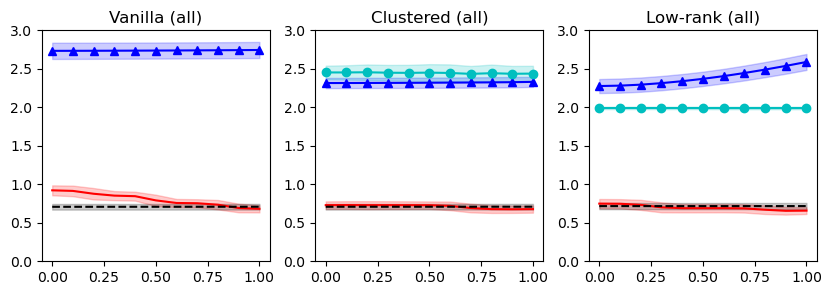

In [8]:
# Simulations


epsilon = 0.2 # 0 or 0.2
idx_set = 'all' # all or S

setting_list = ['vanilla', 'clustered', 'lowrank']
delta_list = [(i / 10) for i in range(11)]

S = 10
seed_list = []
for idx in range(1, 11):
    tmp = np.array(range(1, S + 1)) * 10000 # random seeds
    for i in range(S):
        seed_list.append( tmp[i] + (idx - 1) * 1000 )
M = len(seed_list)


def plot_curves(fig, mean, sd, lst, marker, color):
    fig.fill_between(lst, mean - sd, mean + sd, alpha = 0.2, color = color)
    fig.plot(lst, mean, marker, color = color)    
    fig.set_ylim([0, 3])

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for (i, setting) in enumerate(setting_list):
    path = './synthetic_' + setting
    results = dict()
    results['ARMUL'] = np.zeros((11, M))
    results['STL'] = np.zeros((11, M))
    results['DP'] = np.zeros((11, M))
    results['baseline'] = np.zeros((11, M))

    for (s, seed) in enumerate(seed_list):
        with open(path + '/{}.txt'.format(seed), "rb") as fp:
            lst = pickle.load(fp)

        for (idx_delta, delta) in enumerate(delta_list):
            # max over S
            tmp = lst[(epsilon, delta, idx_set)]
            results['ARMUL'][idx_delta, s] = np.max( np.array(tmp['ARMUL']) )
            results['STL'][idx_delta, s] = np.max( np.array(tmp['STL']) )
            results['DP'][idx_delta, s] = np.max( np.array(tmp['DP']) )
            if setting == 'clustered' or setting == 'lowrank':
                results['baseline'][idx_delta, s] = np.max( np.array(tmp['baseline']) )

    names = ['ARMUL', 'STL', 'DP', 'baseline']
    Mean = dict()
    SD = dict()

    for name in names:
        Mean[name] = np.zeros(11)
        SD[name] = np.zeros(11)
        for j in range(11):
            SD[name][j] = np.std(results[name][j]) #/ np.sqrt( len(results[name][j]) )
            Mean[name][j] = np.mean(results[name][j])
    
    plot_curves(axes[i], Mean['ARMUL'], SD['ARMUL'], delta_list, marker = '-', color = 'r')
    plot_curves(axes[i], Mean['STL'], SD['STL'], delta_list, marker = '--', color = 'k')
    plot_curves(axes[i], Mean['DP'], SD['DP'], delta_list, marker = '^-', color = 'b')
    if setting == 'clustered' or setting == 'lowrank':
        plot_curves(axes[i], Mean['baseline'], SD['baseline'], delta_list, marker = 'o-', color = 'c') 
    
if epsilon == 0:
    axes[0].set_title('Vanilla')
    axes[1].set_title('Clustered')
    axes[2].set_title('Low-rank')
    fig.savefig('epsilon_0.pdf', format = 'pdf')
else: # epsilon == 0.2
    if idx_set == 'S':
        axes[0].set_title('Vanilla (S)')
        axes[1].set_title('Clustered (S)')
        axes[2].set_title('Low-rank (S)')
        fig.savefig('epsilon_2_S.pdf', format = 'pdf')
    else: # idx_set == 'all'
        axes[0].set_title('Vanilla (all)')
        axes[1].set_title('Clustered (all)')
        axes[2].set_title('Low-rank (all)')
        fig.savefig('epsilon_2_all.pdf', format = 'pdf')
    

    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [12]:
model = 'vanilla'

#seed_list = [10000, 20000, 30000, 40000, 50000]

#seed_list = [10000 + i * 1000 for i in range(10)] + [20000 + i * 1000 for i in range(10)]

#'''
I, S = 10, 5
seed_list = []
tmp = np.array(range(1, S + 1)) * 10000
for idx in range(I):
    for i in range(S):
        seed_list.append( tmp[i] + idx * 1000 )    
#'''

#############################
        
path = 'real/' + model

results = dict()
for (j, seed) in enumerate(seed_list):
    with open(path + '/{}.txt'.format(seed), "rb") as fp:
        results[j] = pickle.load(fp)

0.010561797752808988 0.0020654394666409486


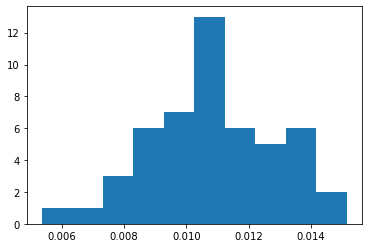

In [13]:
M = len(seed_list)
lst = np.zeros(M)

tmp = ['vanilla', 'lowrank', 'clustered']
S1 = set(tmp)
tmp = ['STL', 'DP_base']
S2 = set(tmp)

for i in range(M):
    if model in S1:
        lst[i] = results[i][0][0]['average error']
    else:       
        lst[i] = results[i][0]['average error']

plt.hist(lst)

mu = np.mean(lst)
sigma = np.std(lst)
print(mu, sigma)

# STL: 0.01933561309233024 0.003117491218757519
# vanilla: 0.010561797752808988 0.0020654394666409486
# DP: 0.034245236932095746 0.00319037457103189
# clustered: 0.008265754763067906 0.002067633659624629
# clustered_base: 0.021485100146555934 0.002936796325000805
# lowrank: 0.007972642892037127 0.0018394310658702423
# lowrank_base: 0.012525647288715192 0.002532323720541887

In [14]:
# STL: 0.01933561309233024
# vanilla: 0.01046409379579873

results[0]

[[{'errors': array([0.        , 0.01666667, 0.        , 0.04761905, 0.        ,
          0.03076923, 0.06557377, 0.        , 0.14035088, 0.03448276,
          0.        , 0.015625  , 0.        , 0.015625  , 0.        ,
          0.02739726, 0.02739726, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.01351351, 0.        , 0.        ,
          0.01282051, 0.01333333, 0.01315789, 0.        , 0.01315789]),
   'average error': 0.015144113336590131},
  array([0.01271419, 0.01125811, 0.01113909, 0.01077252, 0.01028631,
         0.01137813, 0.01452729, 0.01864164, 0.02179985, 0.02531337])]]

0.010286307296414053


IndexError: list index out of range

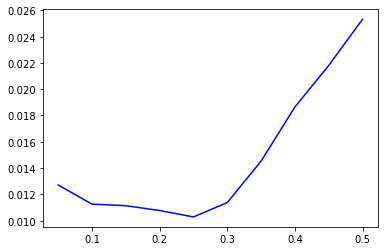

In [15]:
s = 0 # seed index
res = results

L = 10
lbd = np.array([(0.5 * i / L) for i in range(1, L + 1)])

K = 1
tmp = res[s][K - 1][1]
plt.plot(lbd, tmp, 'b')
print(min(tmp))

K = 2
tmp = res[s][K - 1][1]
plt.plot(lbd, tmp, 'b')
print(min(tmp))

K = 3
tmp = res[s][K - 1][1]
plt.plot(lbd, tmp, 'c')
print(min(tmp))

K = 4
tmp = res[s][K - 1][1]
plt.plot(lbd, tmp, 'k')
print(min(tmp))

K = 5
tmp = res[s][K - 1][1]
plt.plot(lbd, tmp, 'g')
print(min(tmp))